# Fertilizer Type Prediction

## Importing the libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Load the dataset

In [3]:
df = pd.read_csv("Fertilizer Prediction.csv")
df

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea
...,...,...,...,...,...,...,...,...,...
94,25,50,32,Clayey,Pulses,24,0,19,28-28
95,30,60,27,Red,Tobacco,4,17,17,10-26-26
96,38,72,51,Loamy,Wheat,39,0,0,Urea
97,36,60,43,Sandy,Millets,15,0,41,DAP


In [4]:
df.sample(10)

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
13,32,62,41,Clayey,Paddy,24,0,22,28-28
55,27,53,43,Black,Millets,23,0,24,28-28
7,33,64,50,Loamy,Wheat,41,0,0,Urea
37,37,70,37,Clayey,Paddy,12,0,41,DAP
53,30,60,47,Sandy,Barley,12,0,42,DAP
19,29,58,52,Loamy,Wheat,13,0,36,DAP
36,30,60,61,Loamy,Cotton,8,10,31,14-35-14
23,28,54,37,Black,Millets,36,0,0,Urea
21,34,65,53,Loamy,Sugarcane,12,14,12,17-17-17
43,34,65,60,Black,Sugarcane,35,0,0,Urea


In [5]:
df.shape

(99, 9)

In [6]:
df.columns

Index(['Temparature', 'Humidity ', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name'],
      dtype='object')

In [7]:
df["Fertilizer Name"].value_counts()

Urea        22
DAP         18
28-28       17
14-35-14    14
20-20       14
17-17-17     7
10-26-26     7
Name: Fertilizer Name, dtype: int64

In [8]:
df.nunique()

Temparature        14
Humidity           13
Moisture           41
Soil Type           5
Crop Type          11
Nitrogen           24
Potassium          13
Phosphorous        32
Fertilizer Name     7
dtype: int64

In [9]:
df.isnull().sum()

Temparature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Temparature      99 non-null     int64 
 1   Humidity         99 non-null     int64 
 2   Moisture         99 non-null     int64 
 3   Soil Type        99 non-null     object
 4   Crop Type        99 non-null     object
 5   Nitrogen         99 non-null     int64 
 6   Potassium        99 non-null     int64 
 7   Phosphorous      99 non-null     int64 
 8   Fertilizer Name  99 non-null     object
dtypes: int64(6), object(3)
memory usage: 7.1+ KB


In [11]:
df.describe()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,30.282828,59.151515,43.181818,18.909091,3.383838,18.606061
std,3.502304,5.840331,11.271568,11.599693,5.814667,13.476978
min,25.000000,50.000000,25.000000,4.000000,0.000000,0.000000
25%,28.000000,54.000000,34.000000,10.000000,0.000000,9.000000
50%,30.000000,60.000000,41.000000,13.000000,0.000000,19.000000
75%,33.000000,64.000000,50.500000,24.000000,7.500000,30.000000
max,38.000000,72.000000,65.000000,42.000000,19.000000,42.000000


## EDA

array([[<AxesSubplot:title={'center':'Temparature'}>,
        <AxesSubplot:title={'center':'Humidity '}>],
       [<AxesSubplot:title={'center':'Moisture'}>,
        <AxesSubplot:title={'center':'Nitrogen'}>],
       [<AxesSubplot:title={'center':'Potassium'}>,
        <AxesSubplot:title={'center':'Phosphorous'}>]], dtype=object)

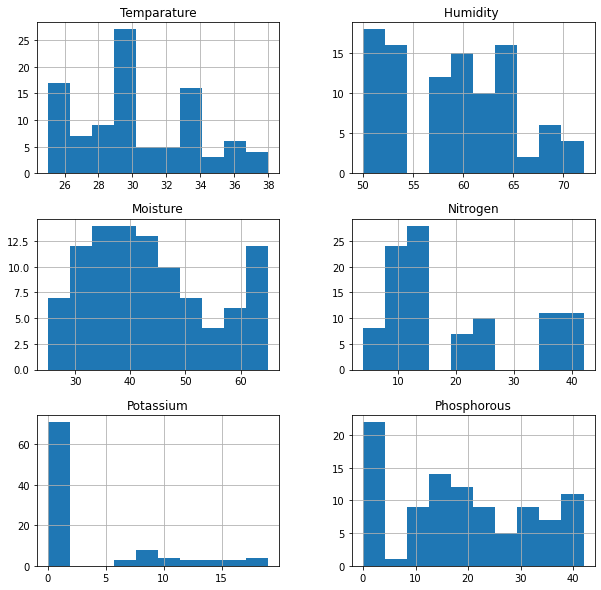

In [12]:
df.hist(figsize=(10,10))

## Train Test Split

In [13]:
y = df["Fertilizer Name"]
X = df.drop(["Fertilizer Name"],axis=1)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [48]:
print('X_train shape:',X_train.shape)
print('y_train shape:',y_train.shape)
print('X_test shape:',X_test.shape)
print('y_test shape:',y_test.shape)

X_train shape: (79, 22)
y_train shape: (79,)
X_test shape: (20, 22)
y_test shape: (20,)


## Checking numerical and categorical columns

In [15]:
num_cols = [col for col in X_train.columns if X_train[col].dtypes!='O']
num_cols

['Temparature',
 'Humidity ',
 'Moisture',
 'Nitrogen',
 'Potassium',
 'Phosphorous']

In [16]:
cat_cols = [col for col in X_train.columns if X_train[col].dtypes=='O']
cat_cols

['Soil Type', 'Crop Type']

## Scaling numerical columns

In [17]:
X_train[num_cols].head()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
49,33,64,51,5,9,29
70,26,52,39,21,0,23
68,25,50,40,6,19,16
15,31,62,49,10,13,14
39,29,58,34,15,0,37


In [18]:
from sklearn.preprocessing import RobustScaler
r = RobustScaler()
r.fit(X_train[num_cols])

RobustScaler()

In [19]:
X_train_num_scaled = r.transform(X_train[num_cols])
X_train_num_scaled 

array([[ 0.6       ,  0.4       ,  0.58823529, -0.61538462,  1.125     ,
         0.53658537],
       [-0.8       , -0.8       , -0.11764706,  0.61538462,  0.        ,
         0.24390244],
       [-1.        , -1.        , -0.05882353, -0.53846154,  2.375     ,
        -0.09756098],
       [ 0.2       ,  0.2       ,  0.47058824, -0.23076923,  1.625     ,
        -0.19512195],
       [-0.2       , -0.2       , -0.41176471,  0.15384615,  0.        ,
         0.92682927],
       [ 1.2       ,  0.8       , -0.17647059, -0.46153846,  1.125     ,
         0.58536585],
       [-0.2       , -0.2       , -0.47058824, -0.30769231,  0.875     ,
         0.58536585],
       [ 0.        ,  0.        , -0.05882353,  2.15384615,  0.        ,
        -0.87804878],
       [ 0.2       ,  0.2       ,  0.41176471,  0.07692308,  1.875     ,
        -0.29268293],
       [ 1.2       ,  0.8       ,  1.23529412,  0.15384615,  0.        ,
         1.07317073],
       [-1.        , -1.        , -0.52941176,  0.

In [20]:
X_test_num_scaled = r.transform(X_test[num_cols])
X_test_num_scaled

array([[ 0.8       ,  0.5       ,  1.35294118,  0.84615385,  0.        ,
         0.09756098],
       [-0.6       , -0.6       , -0.64705882,  0.        ,  0.        ,
        -0.24390244],
       [ 0.        ,  0.        , -0.82352941, -0.69230769,  2.125     ,
        -0.04878049],
       [-0.4       , -0.6       ,  1.41176471,  2.        ,  0.        ,
        -0.87804878],
       [ 1.2       ,  0.        ,  0.11764706,  0.15384615,  0.        ,
         1.12195122],
       [ 0.2       ,  0.2       ,  0.17647059,  0.61538462,  0.        ,
         0.48780488],
       [-0.6       , -0.7       , -0.35294118,  1.84615385,  0.        ,
        -0.87804878],
       [ 0.4       ,  0.2       , -0.41176471,  0.69230769,  0.        ,
         0.29268293],
       [-0.6       , -0.6       , -0.76470588,  0.        ,  0.        ,
         1.07317073],
       [-0.8       , -0.8       , -0.17647059,  1.84615385,  0.        ,
        -0.87804878],
       [ 0.        ,  0.        , -0.82352941, -0.

## Encoding categorical columns

In [21]:
X_train[cat_cols].head()

,Soil Type,Crop Type
49,Sandy,Maize
70,Clayey,Pulses
68,Clayey,Pulses
15,Black,Sugarcane
39,Sandy,Millets


In [22]:
from sklearn.preprocessing import OneHotEncoder
o = OneHotEncoder(sparse=False, handle_unknown='ignore')
o.fit(X_train[cat_cols])

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [23]:
X_train_cat_encoded = o.transform(X_train[cat_cols])
X_train_cat_encoded

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [24]:
X_test_cat_encoded = o.transform(X_test[cat_cols])
X_test_cat_encoded

array([[1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,

In [25]:
X_train = pd.DataFrame(np.concatenate((X_train_num_scaled, X_train_cat_encoded), axis=1))
X_train

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0.6,0.4,0.588235,-0.615385,1.125,0.536585,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.8,-0.8,-0.117647,0.615385,0.000,0.243902,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-1.0,-1.0,-0.058824,-0.538462,2.375,-0.097561,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.2,0.2,0.470588,-0.230769,1.625,-0.195122,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.2,-0.2,-0.411765,0.153846,0.000,0.926829,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,-0.4,-0.6,0.000000,1.769231,0.000,-0.878049,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
75,0.2,0.2,-0.529412,2.000000,0.000,-0.878049,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
76,-0.8,-0.8,-0.588235,0.076923,0.000,1.121951,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
77,1.2,0.8,0.000000,2.153846,0.000,-0.878049,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
X_test = pd.DataFrame(np.concatenate((X_test_num_scaled, X_test_cat_encoded), axis=1))
X_test

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0.8,0.5,1.352941,0.846154,0.000,0.097561,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.6,-0.6,-0.647059,0.000000,0.000,-0.243902,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,-0.823529,-0.692308,2.125,-0.048780,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.4,-0.6,1.411765,2.000000,0.000,-0.878049,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.2,0.0,0.117647,0.153846,0.000,1.121951,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.2,0.2,0.176471,0.615385,0.000,0.487805,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,-0.6,-0.7,-0.352941,1.846154,0.000,-0.878049,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7,0.4,0.2,-0.411765,0.692308,0.000,0.292683,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,-0.6,-0.6,-0.764706,0.000000,0.000,1.073171,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9,-0.8,-0.8,-0.176471,1.846154,0.000,-0.878049,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Encoding the target

In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_encoded = le.fit(y_train)
y_train_encoded = le.transform(y_train)

In [28]:
y_test_encoded = le.transform(y_test)

In [29]:
y_train_encoded

array([1, 4, 0, 2, 5, 1, 1, 6, 2, 5, 4, 4, 5, 5, 2, 1, 3, 6, 6, 4, 4, 6,
       4, 6, 5, 1, 4, 5, 4, 3, 4, 4, 2, 4, 3, 3, 5, 1, 0, 6, 3, 2, 6, 4,
       3, 3, 1, 3, 6, 0, 1, 2, 6, 1, 3, 1, 6, 1, 5, 0, 3, 5, 3, 5, 6, 2,
       1, 6, 6, 1, 5, 0, 5, 3, 6, 6, 5, 6, 3])

In [30]:
y_test_encoded

array([4, 3, 0, 6, 5, 4, 6, 4, 5, 6, 5, 4, 4, 1, 5, 6, 5, 6, 0, 6])

## Model Training and Evaluation

In [31]:
## model 1
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train_encoded)
print('Training accuracy: ', model.score(X_train,y_train_encoded))     

Training accuracy:  1.0


In [32]:
y_pred = model.predict(X_test)
y_pred

array([5, 3, 0, 6, 5, 4, 6, 4, 5, 6, 5, 4, 4, 1, 5, 6, 5, 6, 1, 6])

Plot confusion matrix <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x000001AC5F7E74F0>


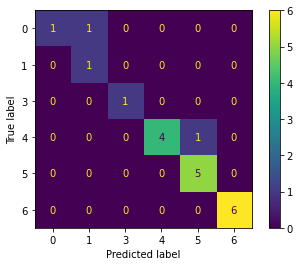

In [33]:
from sklearn.metrics import plot_confusion_matrix, classification_report

print("Plot confusion matrix",plot_confusion_matrix(model,X_test,y_test_encoded))

In [34]:
print("Classification Report",classification_report(y_test_encoded,y_pred))

Classification Report               precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.50      1.00      0.67         1
           3       1.00      1.00      1.00         1
           4       1.00      0.80      0.89         5
           5       0.83      1.00      0.91         5
           6       1.00      1.00      1.00         6

    accuracy                           0.90        20
   macro avg       0.89      0.88      0.86        20
weighted avg       0.93      0.90      0.90        20



In [35]:
## model 2

from sklearn.tree import DecisionTreeClassifier
model_2 = DecisionTreeClassifier()
model_2.fit(X_train,y_train_encoded)
print('Training accuracy: ',model_2.score(X_train,y_train_encoded))

Training accuracy:  1.0


In [36]:
y_prediction = model_2.predict(X_test)
y_prediction

array([4, 3, 0, 6, 5, 4, 6, 4, 5, 6, 5, 4, 4, 1, 5, 6, 5, 6, 0, 6])

Plot confusion matrix <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x000001AC61C91C70>


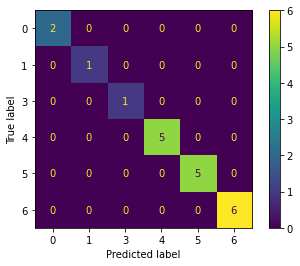

In [37]:
print("Plot confusion matrix",plot_confusion_matrix(model_2,X_test,y_test_encoded))

In [38]:
print("Classification Report",classification_report(y_test_encoded,y_prediction))

Classification Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         6

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [39]:
## model 3
from sklearn.ensemble import RandomForestClassifier
model_3=RandomForestClassifier()
model_3.fit(X_train,y_train_encoded)
print('Training accuracy: ',model_3.score(X_train,y_train_encoded))

Training accuracy:  1.0


In [40]:
y_predict = model_3.predict(X_test)
y_predict

array([4, 3, 0, 6, 5, 4, 6, 4, 5, 6, 5, 4, 4, 1, 5, 6, 5, 6, 2, 6])

Plot confusion matrix <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x000001AC61FA8580>


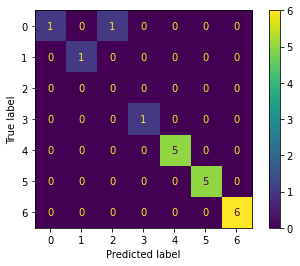

In [41]:
print("Plot confusion matrix",plot_confusion_matrix(model_3,X_test,y_test_encoded))
    

In [42]:
print("Classification Report",classification_report(y_test_encoded,y_predict))

Classification Report               precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       1.00      1.00      1.00         1
           2       0.00      0.00      0.00         0
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         6

    accuracy                           0.95        20
   macro avg       0.86      0.79      0.81        20
weighted avg       1.00      0.95      0.97        20



In [44]:
## model 4

from sklearn.ensemble import GradientBoostingClassifier
model_4 = GradientBoostingClassifier()
model_4.fit(X_train,y_train_encoded)
print('Training accuracy: ',model_4.score(X_train,y_train_encoded))

Training accuracy:  1.0


In [45]:
y_predic = model_4.predict(X_test)
y_predic

array([4, 3, 0, 6, 5, 4, 6, 4, 5, 6, 5, 4, 4, 1, 1, 6, 5, 6, 0, 6])

Plot confusion matrix <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x000001AC61CE94C0>


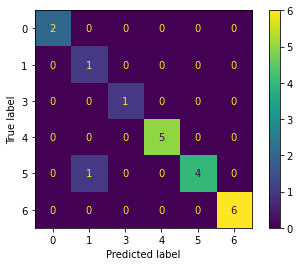

In [46]:
print("Plot confusion matrix",plot_confusion_matrix(model_4,X_test,y_test_encoded))

In [47]:
print("Classification Report",classification_report(y_test_encoded,y_predic))

Classification Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       0.50      1.00      0.67         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         5
           5       1.00      0.80      0.89         5
           6       1.00      1.00      1.00         6

    accuracy                           0.95        20
   macro avg       0.92      0.97      0.93        20
weighted avg       0.97      0.95      0.96        20

